# Task: Analyze the data using methods and software of your choice and prepare a brief presentation with the key findings to the marketing department. The task is divided into two parts:


# Part 1: perform EDA of the data and visualize key patterns and/or recent trends of the type of clients or products sold.

In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data set.
data= pd.read_csv("Data Scientist case rawdata right dates.csv", sep = ';', nrows = 5000)

In [3]:
#Printing the data
print (data) 

      companyID  county  city  companytype  turnover_class customertype  \
0           127       1   180           81              11           B5   
1           127       1   180           81              11           B5   
2           127       1   180           81              11           B5   
3           127       1   180           81              11           B5   
4           127       1   180           81              11           B5   
...         ...     ...   ...          ...             ...          ...   
4995        440      17  1737           82              16           B3   
4996        440      17  1737           82              16           B3   
4997        440      17  1737           82              16           B3   
4998        440      17  1737           82              16           B3   
4999        440      17  1737           82              16           B3   

        sni  emp_class  customer yearmonth productcode    sales  
0     20150         14         1 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   companyID       5000 non-null   int64 
 1   county          5000 non-null   int64 
 2   city            5000 non-null   int64 
 3   companytype     5000 non-null   int64 
 4   turnover_class  5000 non-null   int64 
 5   customertype    5000 non-null   object
 6   sni             5000 non-null   int64 
 7   emp_class       5000 non-null   int64 
 8   customer        5000 non-null   int64 
 9   yearmonth       5000 non-null   object
 10  productcode     5000 non-null   object
 11  sales           5000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 468.9+ KB


In [5]:
#Getting the Uniqueness catrgorical variable
categorical = data.select_dtypes(['category', 'object']).columns
for col in categorical:
    print('{} : {} unique value(s)'.format(col, data[col].nunique()))

customertype : 6 unique value(s)
yearmonth : 64 unique value(s)
productcode : 67 unique value(s)


In [6]:
#Checking the unique value
len(data['turnover_class'].unique())

8

In [7]:
len(data['sni'].unique())

5

In [8]:
data['county'].unique()

array([ 1,  3,  4,  5,  6,  7,  8, 10, 12, 13, 14, 17])

In [9]:
#Get the number of missing data points per column
missing_values_count = data.isnull().sum()

#Look at the # of missing points in the first ten columns
missing_values_count[0:10]

companyID         0
county            0
city              0
companytype       0
turnover_class    0
customertype      0
sni               0
emp_class         0
customer          0
yearmonth         0
dtype: int64

### Data is very clean. No null values

### let's understand the categorical data and the quantity we have for each type so it will be helpful to forecast predictions

In [10]:
categorical_features = ["productcode","customertype"]

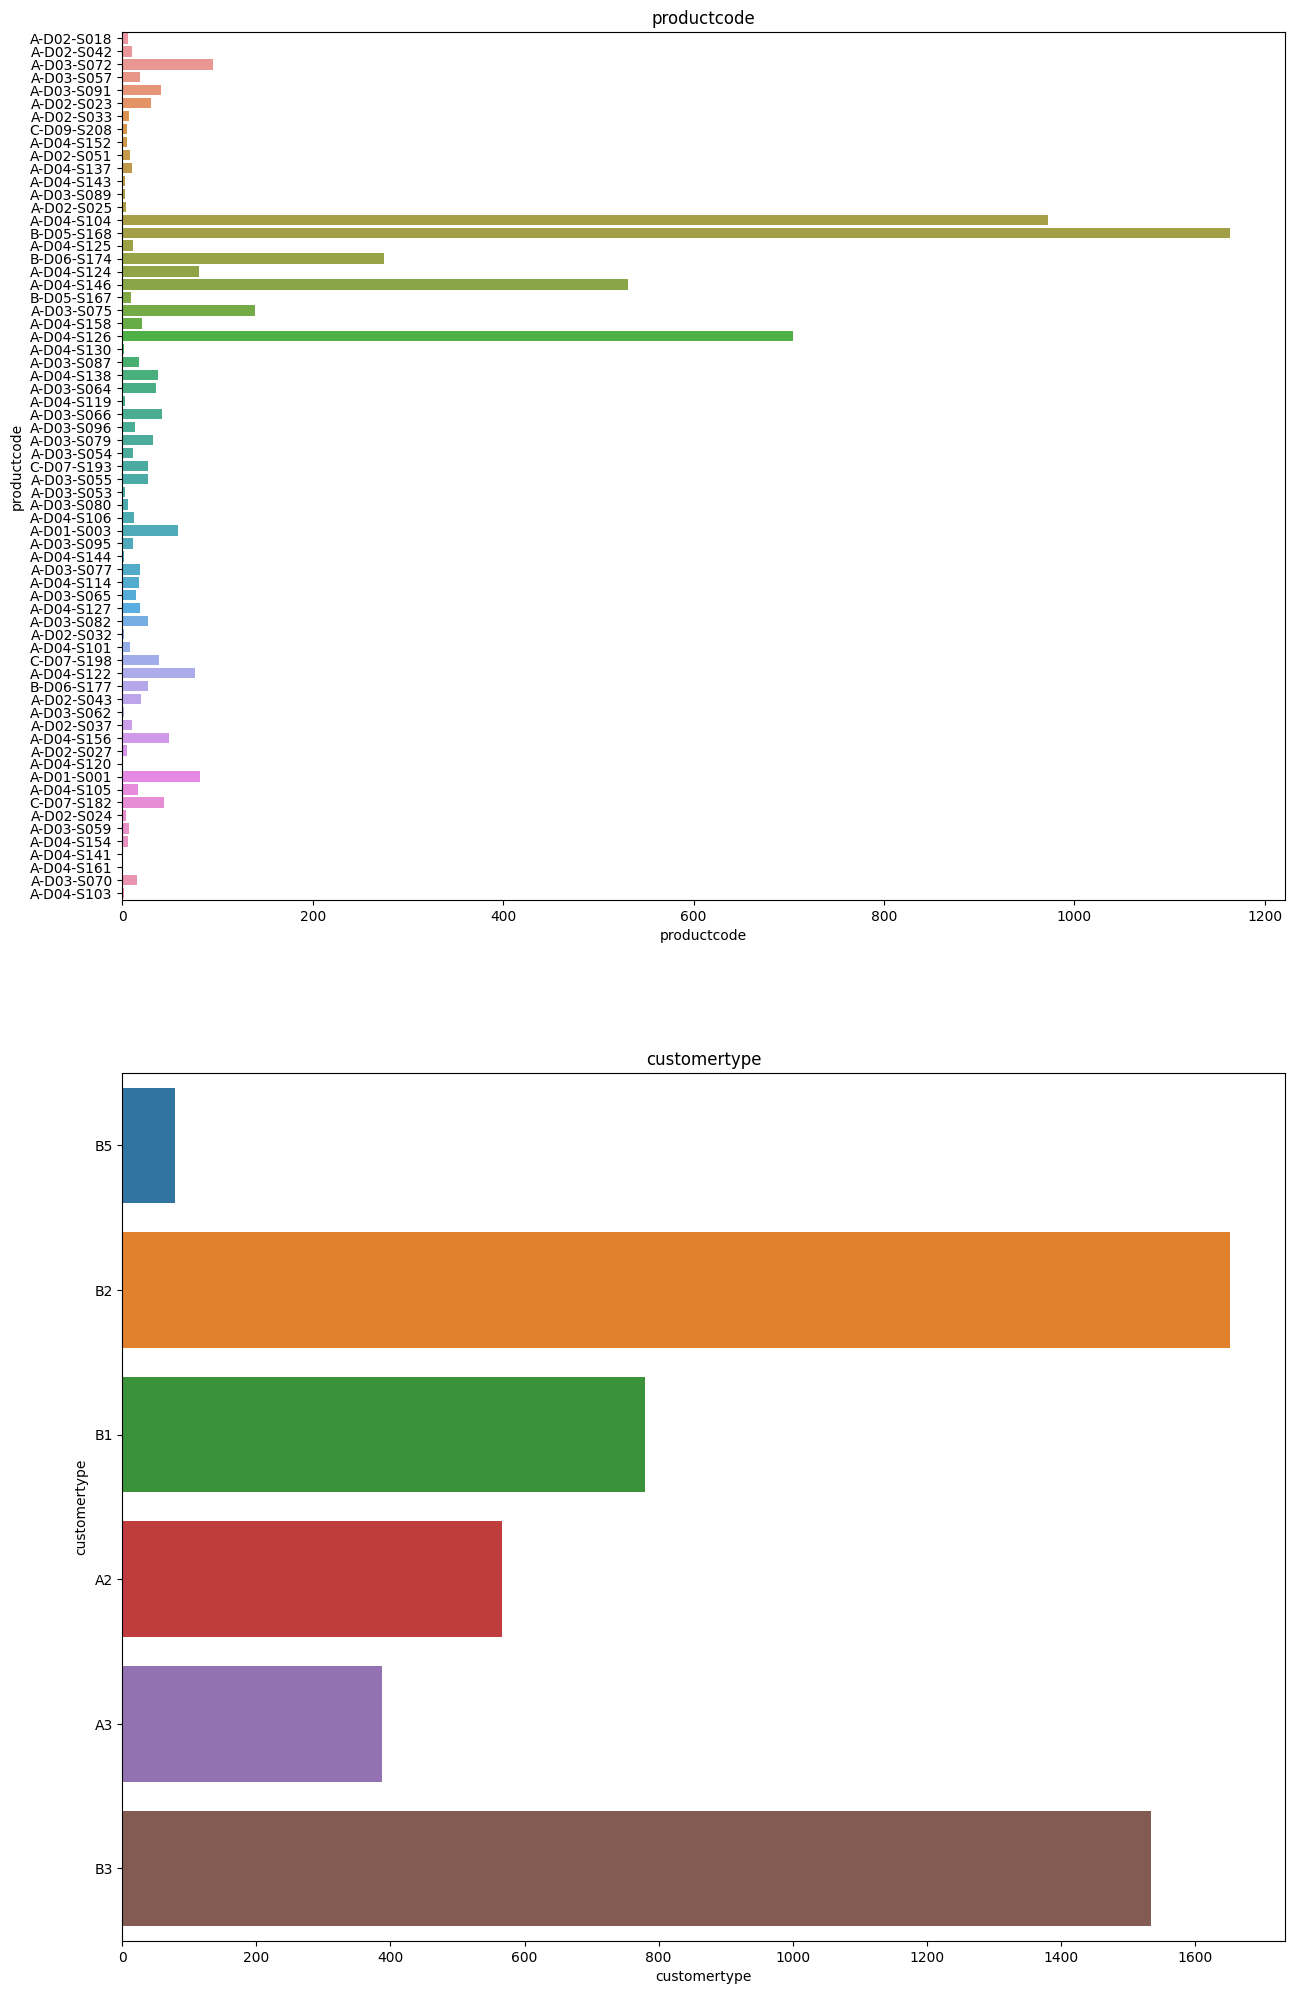

In [11]:
#check count based on categorical features
plt.figure(figsize=(15,160), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,1,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

## From above plot, we understand that there are 5 products which have high number of quantity as compared to others. And in customertype column, B2 and B3 have more quantity as compared to B5. 

In [12]:
#Extract month from year column 
data['month'] = pd.DatetimeIndex(data['yearmonth']).month

### Q 1: What was the best month for sales? 

<AxesSubplot:xlabel='month'>

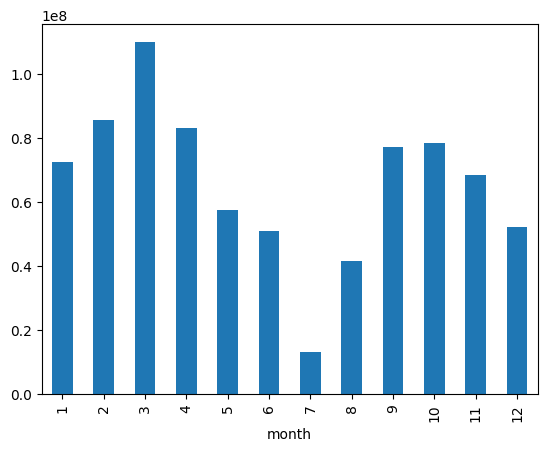

In [13]:
data.groupby('month')['sales'].sum().plot.bar()

### Month 'March' has highest number of sales and month of 'july' is lowest

### Q2 : What City had the highest number of sales?

<AxesSubplot:xlabel='city'>

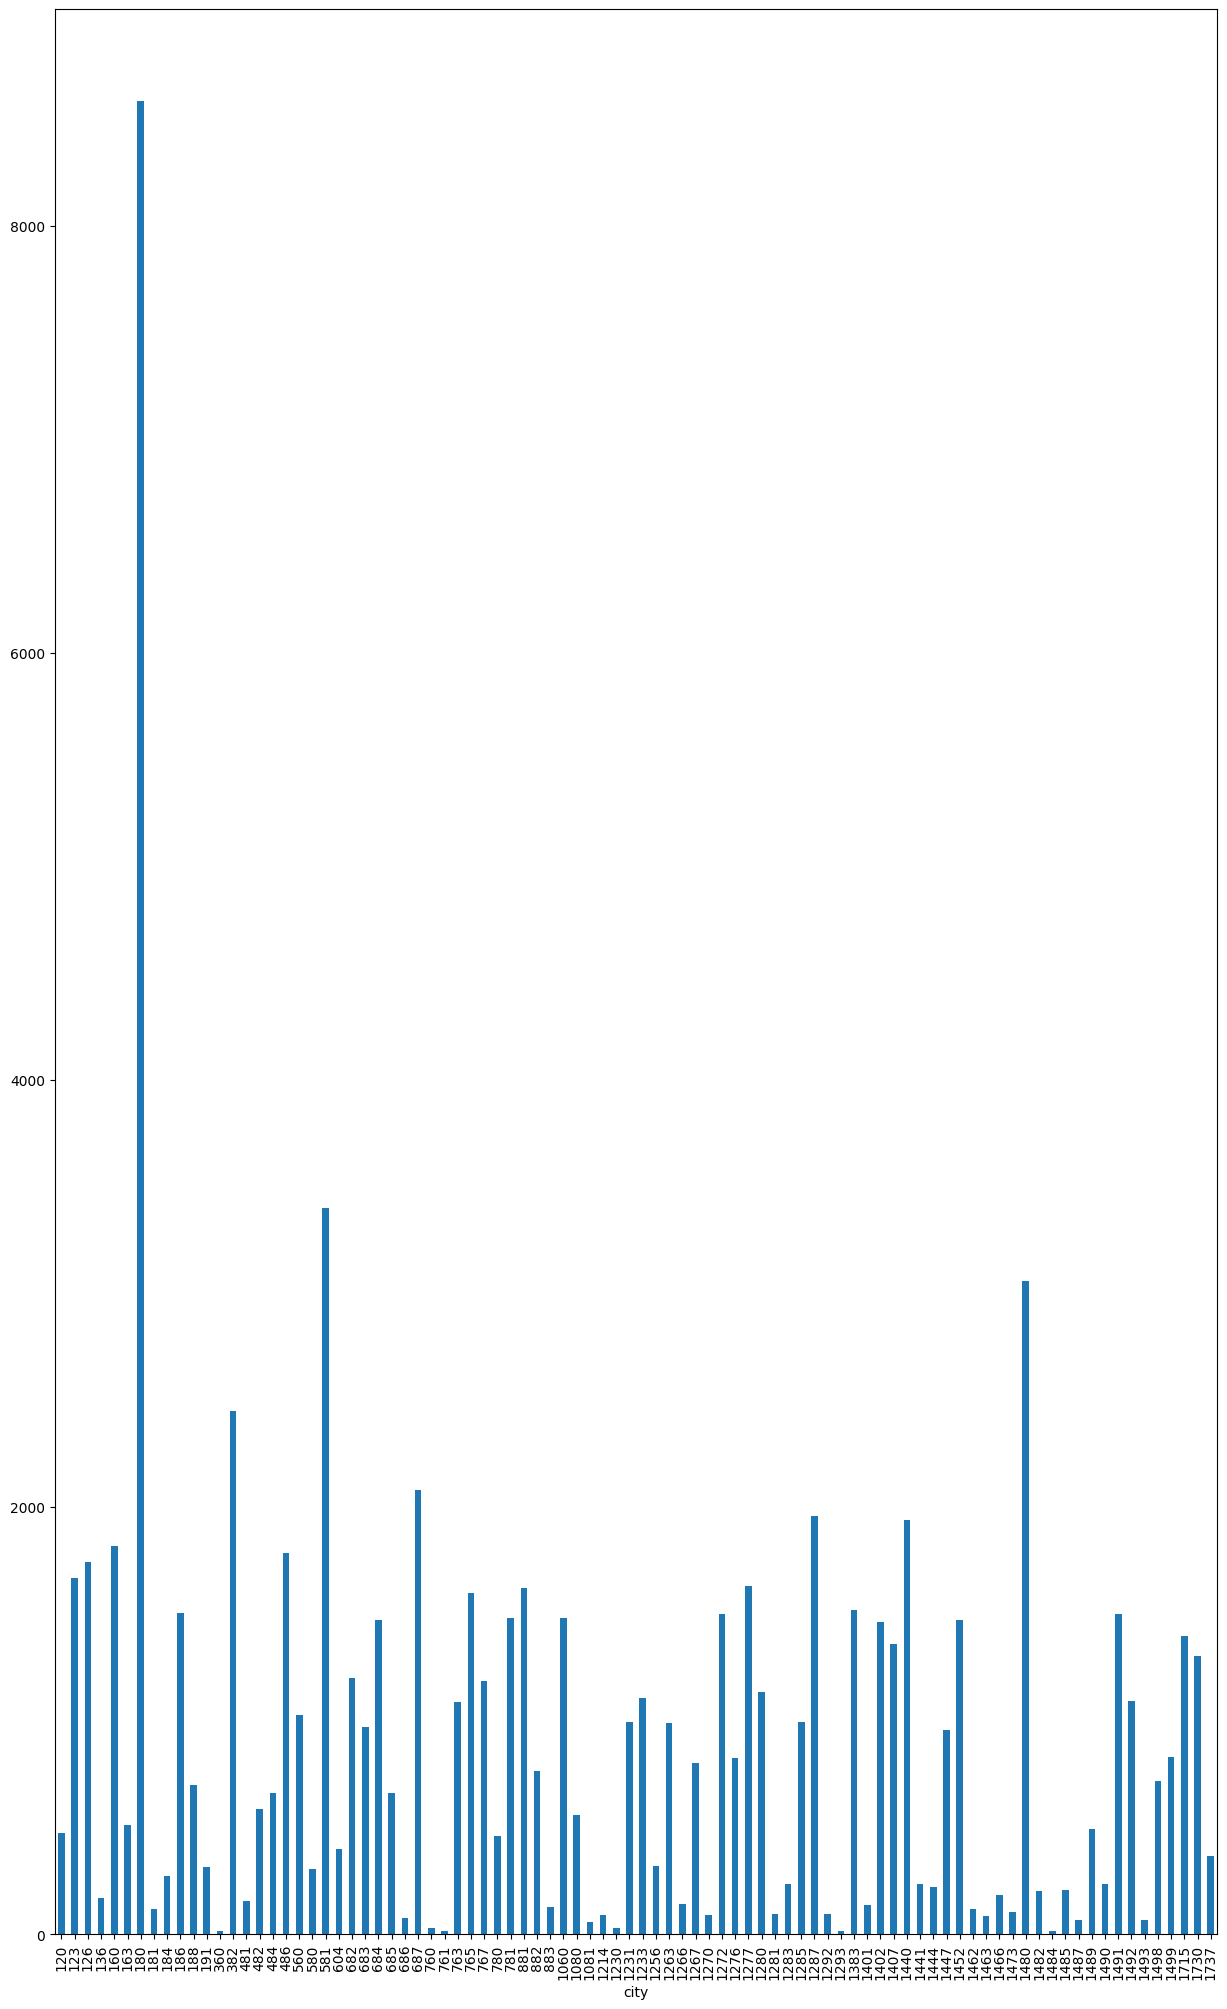

In [14]:
data.groupby('city')['turnover_class'].sum().plot.bar(figsize=(15,25))

## City ' 180 ' has highest turnover 

### Q3: What was the product sold the most?

<AxesSubplot:xlabel='productcode'>

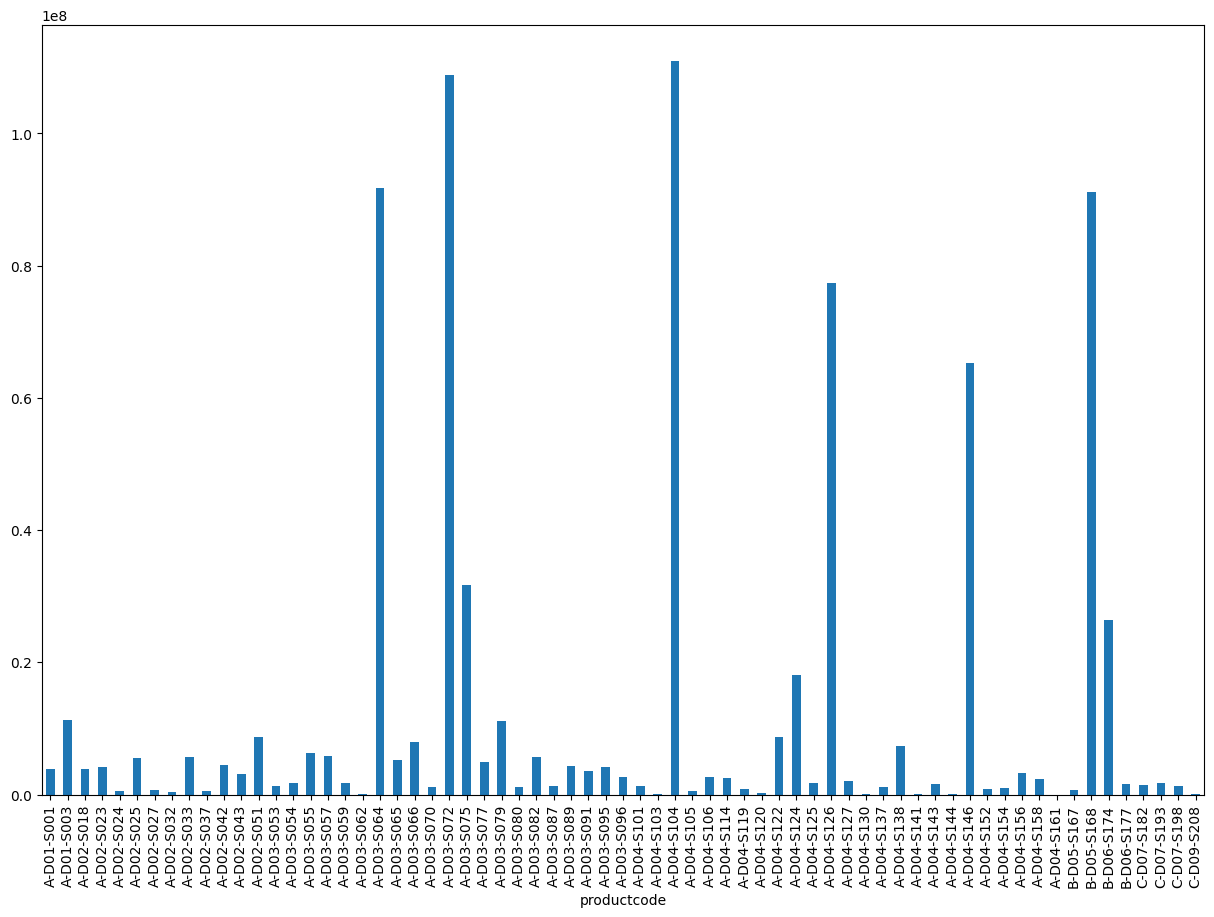

In [15]:
data.groupby('productcode')['sales'].sum().plot.bar(figsize=(15,10))

### Product code 'A-D03-S072' and 'A-D04-S104' has highest number of sales

<AxesSubplot:ylabel='sales'>

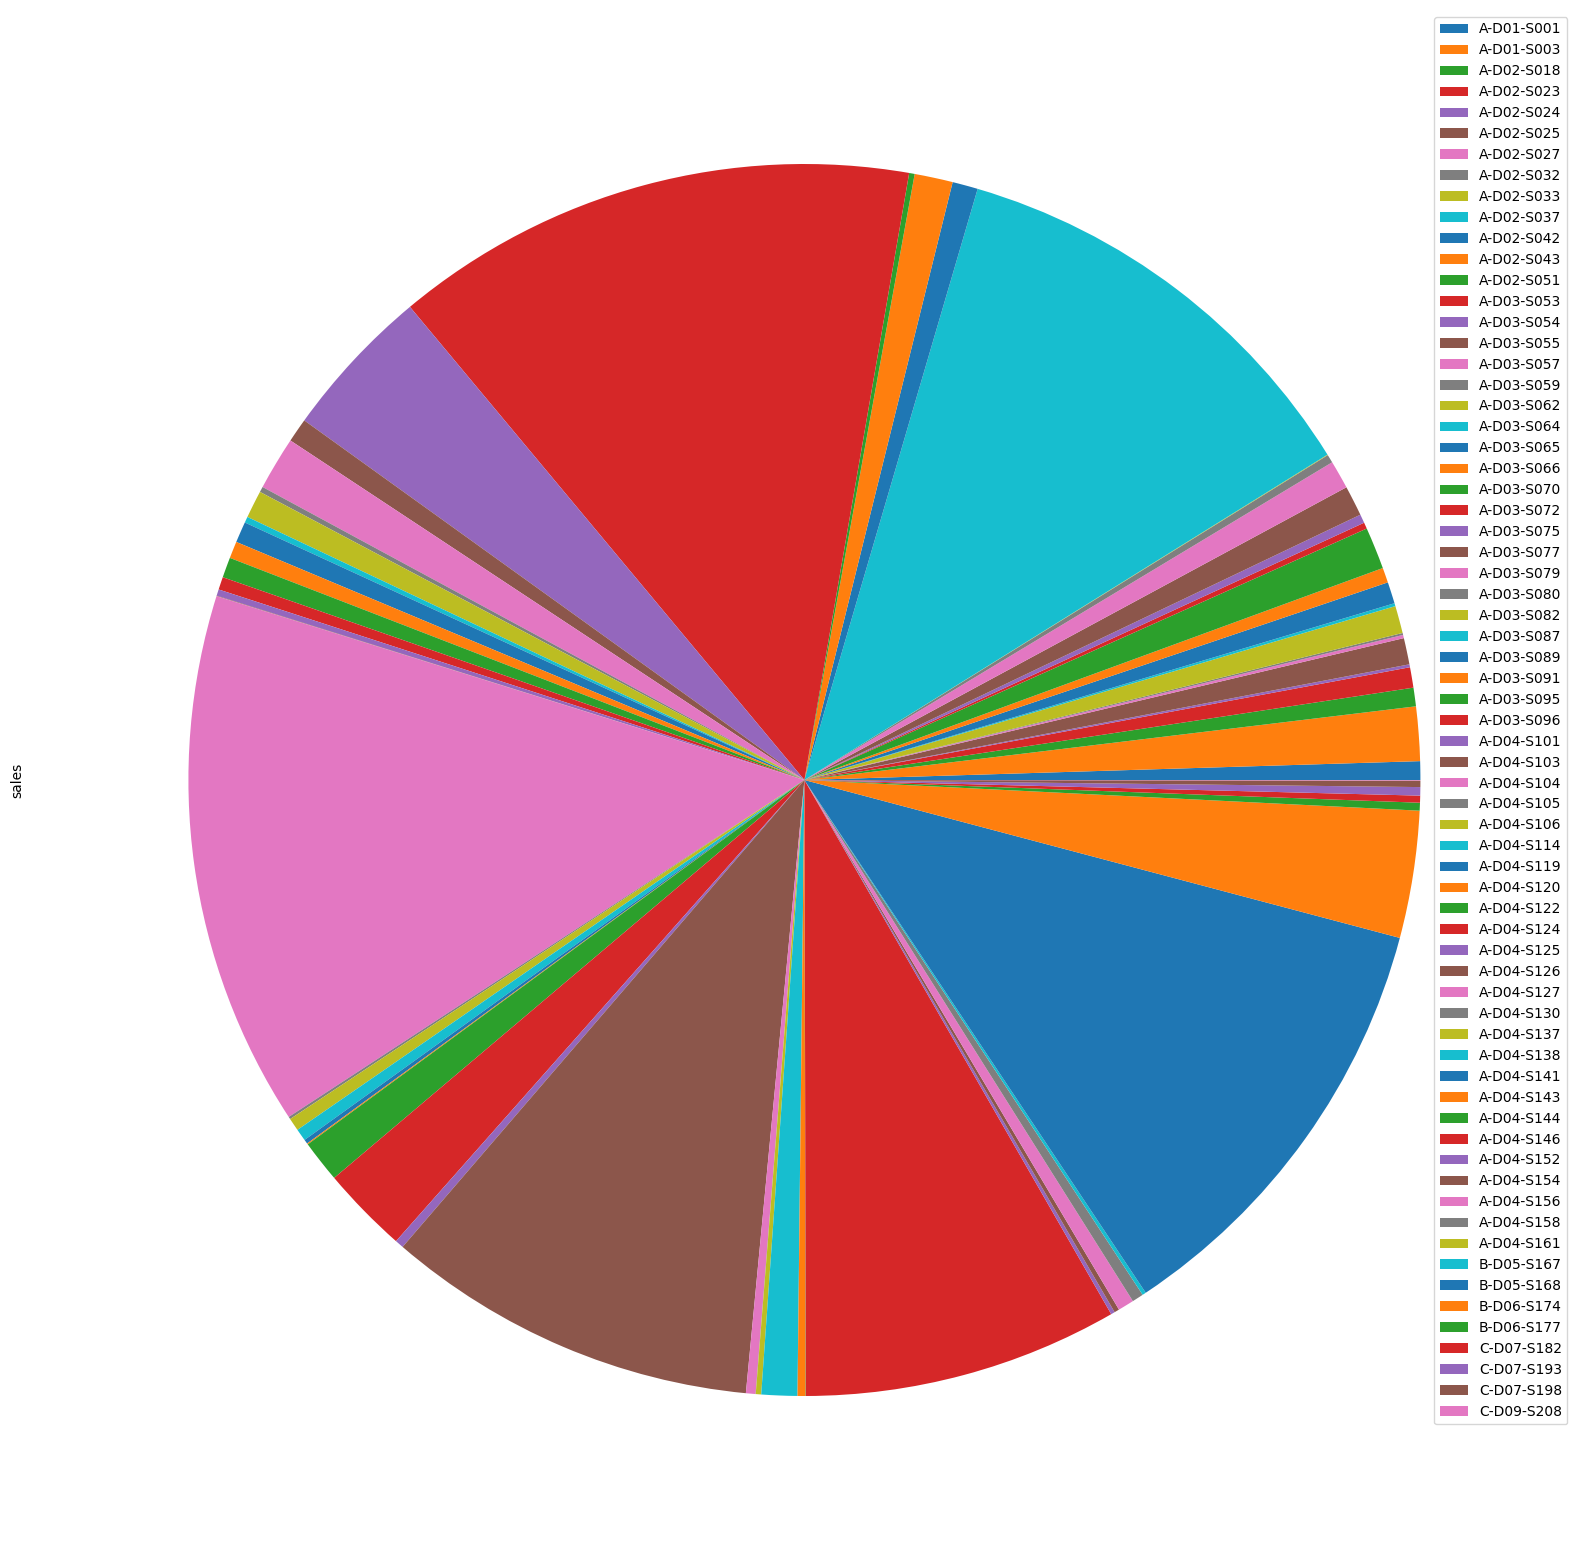

In [16]:
#piechart for the distribution of the prodcuts
new = data.groupby(['productcode']).sum()

new.plot(kind='pie', y='sales',labels= None, figsize=(20,20),pctdistance=1.1, labeldistance=1.2)

### Q4. Which products are famous in which category of customers?

<AxesSubplot:xlabel='customertype', ylabel='productcode'>

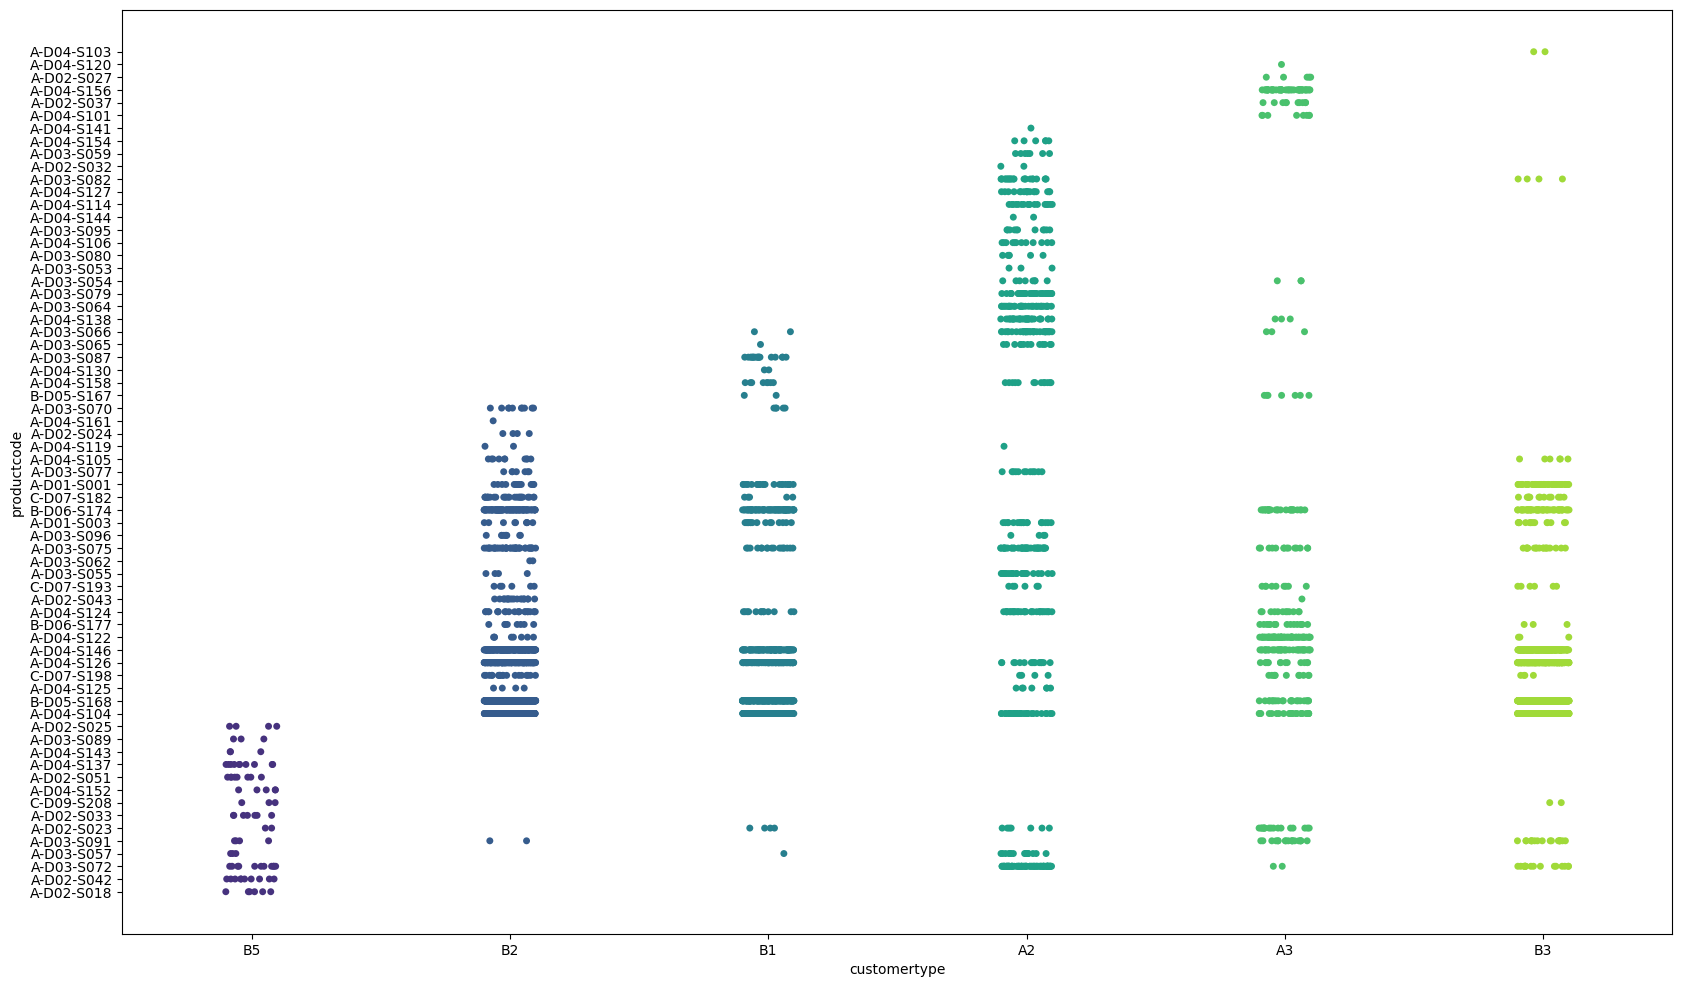

In [17]:
plt.figure(figsize=(20,12))
sns.stripplot(x='customertype', y='productcode', data=data, jitter=True, dodge=True, palette='viridis')

## Each customer type group has different likeliness to buy product

### Q.5 Which country contributes most in sales?

<AxesSubplot:xlabel='county'>

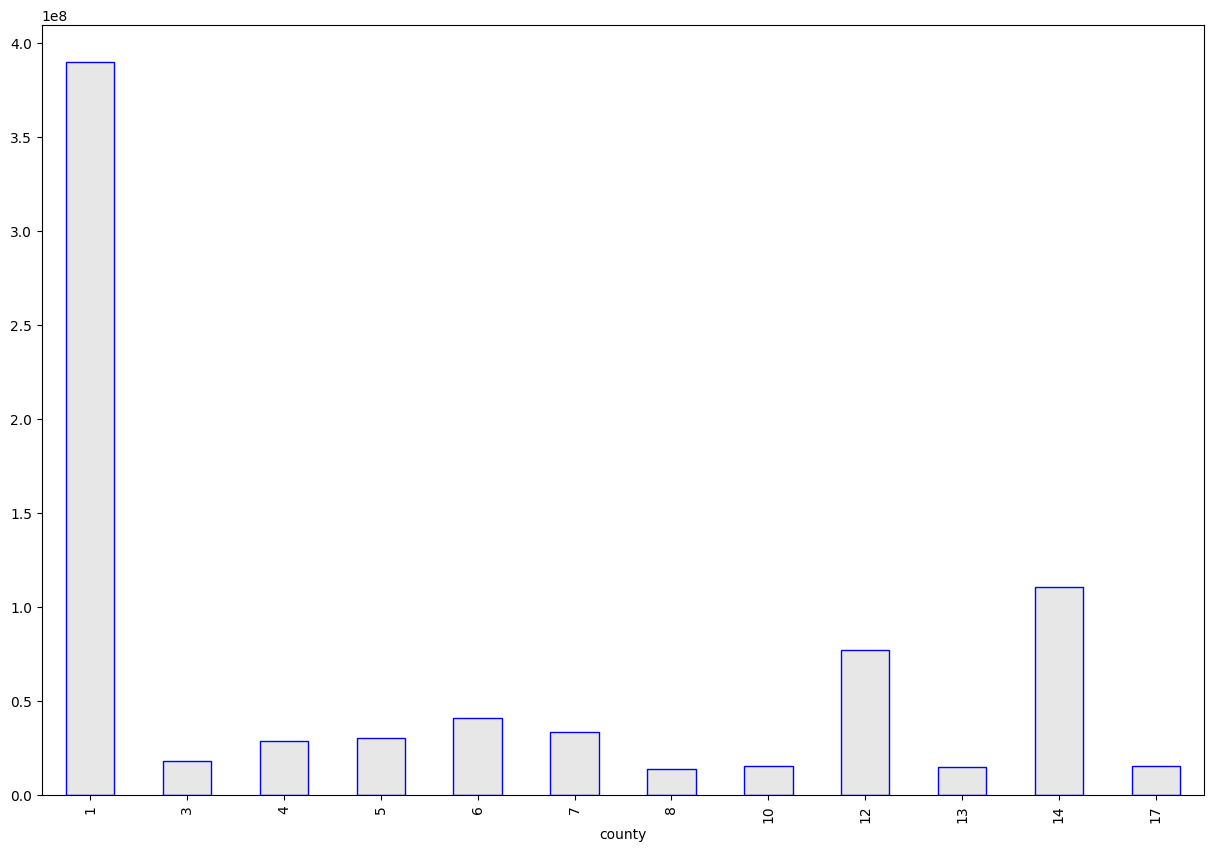

In [18]:
data.groupby('county')['sales'].sum().plot.bar(figsize=(15,10), color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue')

### County '1' contributes to the highest sales